In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense,
    Dropout, BatchNormalization
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [25]:
TRAIN_DIR = "/content/GTSRB/GTSRB/train_modified"
TEST_DIR  = "/content/GTSRB/GTSRB/test_modified"

In [26]:
IMG_SIZE = (64, 64)     # μικρό μέγεθος για να αντέχει το Colab
BATCH_SIZE = 32
EPOCHS = 30


In [27]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [28]:
import zipfile
import os

zip_path = '/content/GTSRB (2).zip'
extract_dir = '/content/GTSRB'

# Check if the target directory already contains the expected subdirectories
# to avoid re-extracting if already done.
if not os.path.exists(os.path.join(extract_dir, 'GTSRB')):
    print(f"Extracting {zip_path} to {extract_dir}...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print("Extraction complete.")
else:
    print(f"Directory {os.path.join(extract_dir, 'GTSRB')} already exists. Skipping extraction.")

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Directory /content/GTSRB/GTSRB already exists. Skipping extraction.
Found 3977 images belonging to 43 classes.
Found 1983 images belonging to 43 classes.


In [29]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(train_generator.num_classes, activation='softmax'))

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,202,603 (8.40 MB)

 Trainable params: 2,202,155 (8.40 MB)

 Non-trainable params: 448 (1.75 KB)

In [30]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [31]:
early_stop = EarlyStopping(patience=7, restore_best_weights=True)
checkpoint = ModelCheckpoint("cnn_scratch_gtsrb_best.h5", save_best_only=True)


In [32]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint]
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 0.0812 - loss: 4.7732

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 73s 549ms/step - accuracy: 0.0813 - loss: 4.7663 - val_accuracy: 0.0787 - val_loss: 5.6236
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 591ms/step - accuracy: 0.1682 - loss: 3.2077

125/125 ━━━━━━━━━━━━━━━━━━━━ 82s 655ms/step - accuracy: 0.1684 - loss: 3.2066 - val_accuracy: 0.1493 - val_loss: 3.0741
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step - accuracy: 0.2668 - loss: 2.6875

125/125 ━━━━━━━━━━━━━━━━━━━━ 71s 570ms/step - accuracy: 0.2669 - loss: 2.6869 - val_accuracy: 0.3101 - val_loss: 2.4262
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.3220 - loss: 2.3520

125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 498ms/step - accuracy: 0.3221 - loss: 2.3517 - val_accuracy: 0.4498 - val_loss: 1.7501
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.3598 - loss: 2.0979

125/125 ━━━━━━━━━━━━━━━━━━━━ 60s 481ms/step - accuracy: 0.3598 - loss: 2.0976 - val_accuracy: 0.4170 - val_loss: 1.6830
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.4062 - loss: 1.9467

125/125 ━━━━━━━━━━━━━━━━━━━━ 61s 487ms/step - accuracy: 0.4061 - loss: 1.9464 - val_accuracy: 0.4826 - val_loss: 1.5535
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.4406 - loss: 1.7194

125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 494ms/step - accuracy: 0.4405 - loss: 1.7198 - val_accuracy: 0.5361 - val_loss: 1.4057
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.4387 - loss: 1.7046

125/125 ━━━━━━━━━━━━━━━━━━━━ 60s 476ms/step - accuracy: 0.4388 - loss: 1.7046 - val_accuracy: 0.5905 - val_loss: 1.2247
Epoch 9/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 499ms/step - accuracy: 0.4673 - loss: 1.6563 - val_accuracy: 0.5774 - val_loss: 1.2789
Epoch 10/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.4766 - loss: 1.5468

125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 492ms/step - accuracy: 0.4767 - loss: 1.5469 - val_accuracy: 0.6470 - val_loss: 1.0831
Epoch 11/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.4988 - loss: 1.5065

125/125 ━━━━━━━━━━━━━━━━━━━━ 61s 489ms/step - accuracy: 0.4988 - loss: 1.5064 - val_accuracy: 0.6707 - val_loss: 0.9858
Epoch 12/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 61s 487ms/step - accuracy: 0.5419 - loss: 1.3756 - val_accuracy: 0.6631 - val_loss: 1.0541
Epoch 13/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.5801 - loss: 1.2973

125/125 ━━━━━━━━━━━━━━━━━━━━ 61s 487ms/step - accuracy: 0.5801 - loss: 1.2971 - val_accuracy: 0.7352 - val_loss: 0.8554
Epoch 14/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.6091 - loss: 1.1753

125/125 ━━━━━━━━━━━━━━━━━━━━ 81s 483ms/step - accuracy: 0.6091 - loss: 1.1754 - val_accuracy: 0.7413 - val_loss: 0.7666
Epoch 15/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.6123 - loss: 1.1661

125/125 ━━━━━━━━━━━━━━━━━━━━ 64s 512ms/step - accuracy: 0.6124 - loss: 1.1661 - val_accuracy: 0.7877 - val_loss: 0.6098
Epoch 16/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 60s 479ms/step - accuracy: 0.6270 - loss: 1.1262 - val_accuracy: 0.7630 - val_loss: 0.7148
Epoch 17/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 0.6490 - loss: 1.0501

125/125 ━━━━━━━━━━━━━━━━━━━━ 83s 485ms/step - accuracy: 0.6492 - loss: 1.0495 - val_accuracy: 0.8326 - val_loss: 0.4813
Epoch 18/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.7023 - loss: 0.8729

125/125 ━━━━━━━━━━━━━━━━━━━━ 61s 488ms/step - accuracy: 0.7024 - loss: 0.8729 - val_accuracy: 0.8386 - val_loss: 0.4786
Epoch 19/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.7214 - loss: 0.8335

125/125 ━━━━━━━━━━━━━━━━━━━━ 59s 476ms/step - accuracy: 0.7214 - loss: 0.8336 - val_accuracy: 0.8558 - val_loss: 0.4314
Epoch 20/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 60s 483ms/step - accuracy: 0.7453 - loss: 0.7772 - val_accuracy: 0.8613 - val_loss: 0.4660
Epoch 21/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 59s 474ms/step - accuracy: 0.7709 - loss: 0.7068 - val_accuracy: 0.8502 - val_loss: 0.4638
Epoch 22/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.7780 - loss: 0.6849

125/125 ━━━━━━━━━━━━━━━━━━━━ 84s 494ms/step - accuracy: 0.7779 - loss: 0.6852 - val_accuracy: 0.8507 - val_loss: 0.4275
Epoch 23/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 61s 489ms/step - accuracy: 0.7660 - loss: 0.6983 - val_accuracy: 0.8336 - val_loss: 0.5158
Epoch 24/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.7957 - loss: 0.6349

125/125 ━━━━━━━━━━━━━━━━━━━━ 59s 475ms/step - accuracy: 0.7957 - loss: 0.6349 - val_accuracy: 0.8790 - val_loss: 0.3800
Epoch 25/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.8015 - loss: 0.5906

125/125 ━━━━━━━━━━━━━━━━━━━━ 61s 485ms/step - accuracy: 0.8016 - loss: 0.5904 - val_accuracy: 0.9042 - val_loss: 0.3012
Epoch 26/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 64s 516ms/step - accuracy: 0.8254 - loss: 0.5857 - val_accuracy: 0.8956 - val_loss: 0.3822
Epoch 27/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 64s 514ms/step - accuracy: 0.8294 - loss: 0.5629 - val_accuracy: 0.8815 - val_loss: 0.3951
Epoch 28/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 59s 469ms/step - accuracy: 0.8477 - loss: 0.4806 - val_accuracy: 0.9052 - val_loss: 0.3603
Epoch 29/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.8623 - loss: 0.4486

125/125 ━━━━━━━━━━━━━━━━━━━━ 60s 479ms/step - accuracy: 0.8622 - loss: 0.4487 - val_accuracy: 0.9183 - val_loss: 0.2962
Epoch 30/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 65s 517ms/step - accuracy: 0.8679 - loss: 0.4407 - val_accuracy: 0.9133 - val_loss: 0.3070


In [33]:
test_loss, test_acc = model.evaluate(test_generator)
print(" Test Accuracy CNN από το μηδέν στο GTSRB:", test_acc)


62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.9328 - loss: 0.2660
 Test Accuracy CNN από το μηδέν στο GTSRB: 0.9183055758476257


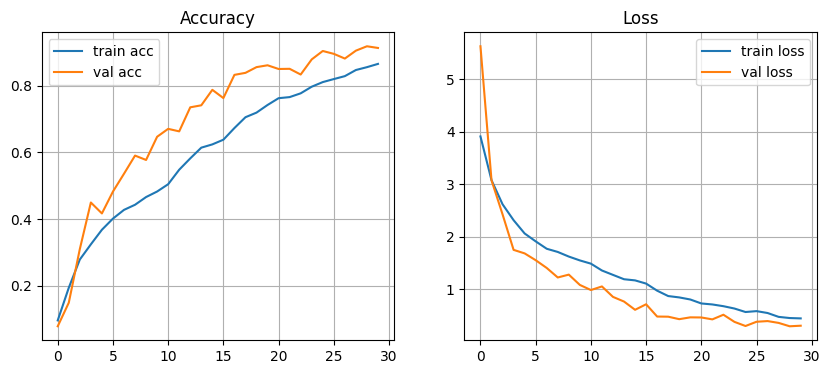

In [34]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.grid()

plt.show()
